In [25]:
from darts import genotypes
from darts.model import NetworkCIFAR
genotype = genotypes.FedNAS_V1
print(genotype)
model = NetworkCIFAR(38, 10, 2, False, genotype)
model.to("cuda:1")

Genotype(normal=[('sep_conv_3x3', 1), ('sep_conv_3x3', 0), ('sep_conv_3x3', 2), ('sep_conv_5x5', 0), ('sep_conv_3x3', 1), ('sep_conv_5x5', 3), ('dil_conv_5x5', 3), ('sep_conv_3x3', 4)], normal_concat=range(2, 6), reduce=[('max_pool_3x3', 0), ('skip_connect', 1), ('max_pool_3x3', 0), ('max_pool_3x3', 2), ('max_pool_3x3', 0), ('dil_conv_5x5', 1), ('max_pool_3x3', 0), ('dil_conv_5x5', 2)], reduce_concat=range(2, 6))
114 114 76
114 304 152


NetworkCIFAR(
  (stem): Sequential(
    (0): Conv2d(3, 114, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(114, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cells): ModuleList(
    (0): Cell(
      (preprocess0): ReLUConvBN(
        (op): Sequential(
          (0): ReLU()
          (1): Conv2d(114, 76, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(76, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (preprocess1): ReLUConvBN(
        (op): Sequential(
          (0): ReLU()
          (1): Conv2d(114, 76, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(76, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (_ops): ModuleList(
        (0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (1): FactorizedReduce(
          (relu): ReLU()
          (conv_1): Conv2d(76, 

In [26]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

190580


In [27]:
from fvcore.nn import FlopCountAnalysis
import torch
flops = FlopCountAnalysis(model, (torch.zeros((64, 3, 32, 32), device="cuda:1")))

In [28]:
print(flops.total())

Unsupported operator aten::add_ encountered 11 time(s)
Unsupported operator aten::max_pool2d encountered 10 time(s)
Unsupported operator aten::bernoulli_ encountered 16 time(s)
Unsupported operator aten::div_ encountered 16 time(s)
Unsupported operator aten::mul_ encountered 16 time(s)
Unsupported operator aten::add encountered 8 time(s)


3182456832


In [5]:
ifedavg_y = [0.851429, 0.861912, 0.874399, 0.893830]
superfed_y = [0.893530, 0.901810, 0.909422, 0.913094]
ifednas_y = [0.7425, 0.845, 0.9505]
ifedavg_x = [0.46, 0.96, 1.65, 3.41]
superfed_x = [0.46, 0.96, 1.65, 3.41]
ifednas_x = [0.67, 8.6, 191.75]
fedpnas_x = [0.5, 1]
fedpnas_y = [0.889, 0.894]
import matplotlib.pyplot as plt


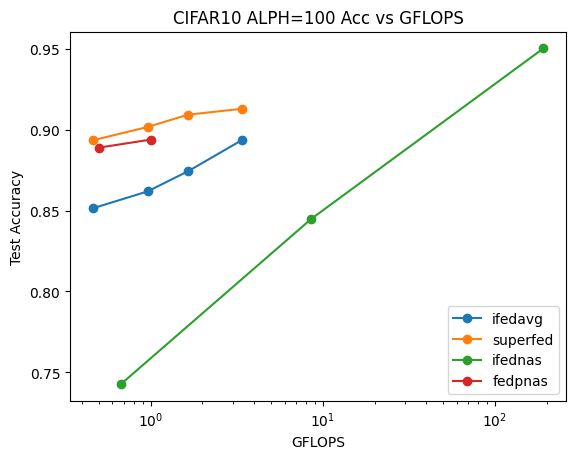

In [5]:
plt.xscale("log")
plt.plot(ifedavg_x, ifedavg_y, marker="o", label="ifedavg")
plt.plot(superfed_x, superfed_y, marker="o", label="superfed")
plt.plot(ifednas_x, ifednas_y, marker="o", label="ifednas")
plt.plot(fedpnas_x, fedpnas_y, marker="o", label="fedpnas")
plt.title('CIFAR10 ALPH=100 Acc vs GFLOPS')
plt.xlabel('GFLOPS')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()
